In [1]:
import sys
sys.path.append("../fractal")
import fractal
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sanity check

In [2]:
xs=utils.gen_koch(6,shape='curve')
scale=np.mean(np.linalg.norm(xs[:-1,:]-xs[1:,:],axis=1))

oversampling method returns the same number of boxes as original method when oversampling rate is 2 (2 points per segement)

In [3]:
boxes0=fractal._get_box(xs, scale)
boxes1=fractal._get_box_oversample(xs, scale, oversample_rate=2)
len(boxes0),len(boxes1),set(boxes0)-set(boxes1)

(3832, 3832, set())

 exact method returns the same number of boxes as oversampling method when oversampling rate approaches infinity.

In [4]:
boxes0=fractal._get_box_exact(xs, scale)
boxes1=fractal._get_box_oversample(xs, scale, oversample_rate=5000)
len(boxes0),len(boxes1),set(boxes0)-set(boxes1)

(4202, 4202, set())

# Plot box grid

In [5]:
xs=utils.gen_koch(6,shape='snowflake')
scale=np.mean(np.linalg.norm(xs[:-1,:]-xs[1:,:],axis=1))*20

In [6]:
boxes0=fractal._get_box_exact(xs,scale)

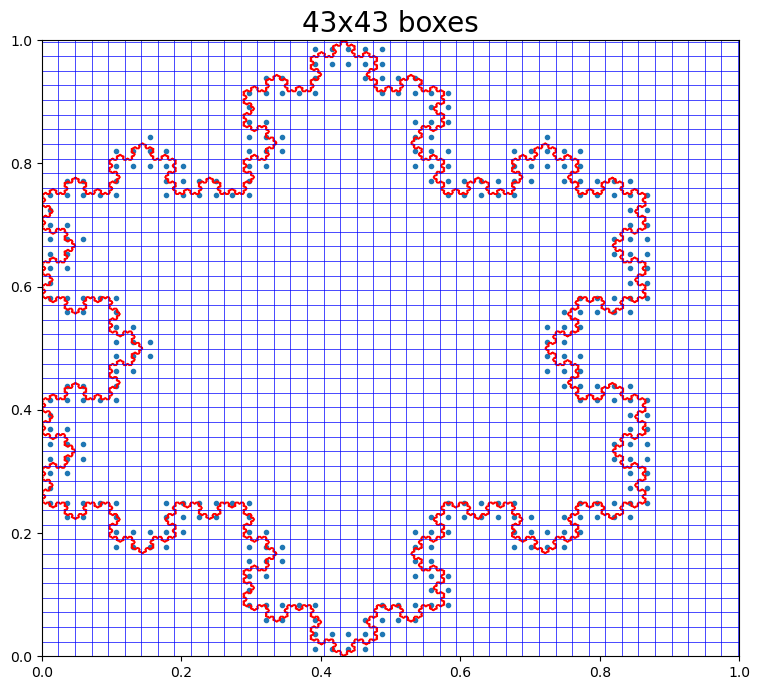

In [7]:
fig=utils.plot_grid(xs, np.array(boxes0), scale, use_lim=True)

# Examples with known fractal dimension

## line

In [8]:
xs=utils.gen_line([[0,0],[5,5]])

In [9]:
scales=0.002*np.exp(np.linspace(np.log(1),np.log(5),10))
oversample_rate=100
res={}
for method in ["original","oversample","exact"]:
    r=fractal.box_counting(xs,scales,method=method, oversample_rate=oversample_rate, return_boxes=True)
    res["box_counting_"+method]=r

r=fractal.temporal_sampling(xs, min_step=1, max_step=2, return_boxes=True)
res["temporal_sampling"]=r    

scales=0.006*np.exp(np.linspace(np.log(1),np.log(5),10))
r=fractal.corr_sum(xs, scales, return_boxes=True)
res["corr_sum"]=r

r=fractal.corr_sum_takens(xs)
res["corr_sum_takens"]=r

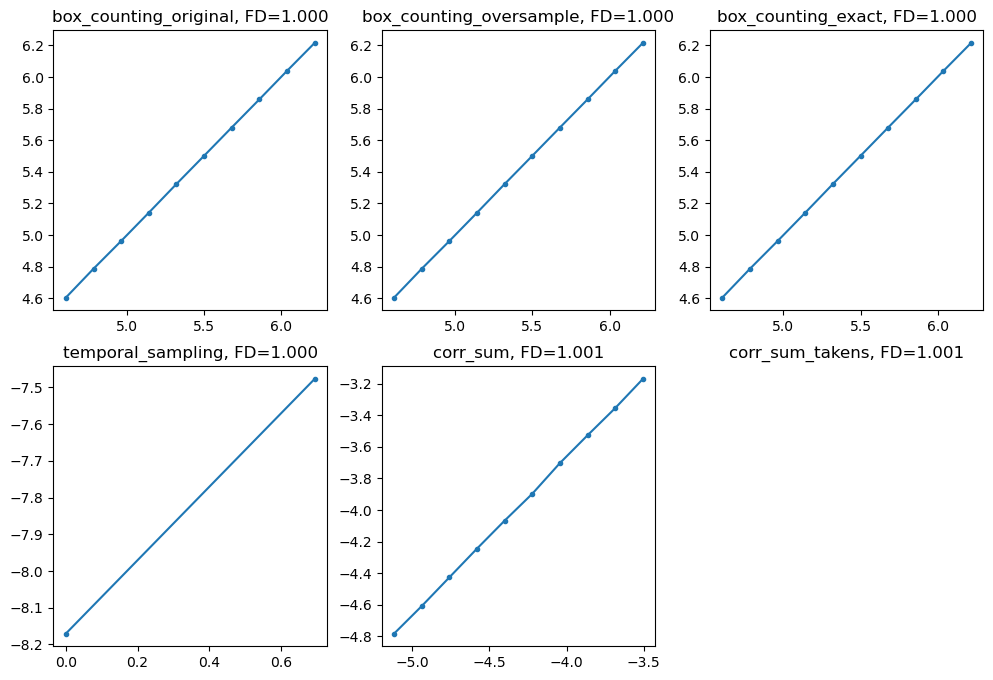

In [10]:
keys=list(res.keys())

fig, axes = plt.subplots(2,3,figsize=(12,8))
for i in range(3):
    key=keys[i]
    r=res[key]
    axes[0,i].plot(-np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
    axes[0,i].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="temporal_sampling"
r=res[key]
axes[1,0].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,0].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum"
r=res[key]
axes[1,1].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,1].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum_takens"
r=res[key]
ax=axes[1,2]
ax.set_title("{}, FD={:.3f}".format(key,r))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);

## circle

In [11]:
xs=utils.gen_circle()

In [12]:
bs=np.mean(np.linalg.norm(xs[:-1,:]-xs[1:,:],axis=1))
scales=bs*np.exp(np.linspace(np.log(1),np.log(3),5))
oversample_rate=100
res={}
for method in ["original","oversample","exact"]:
    r=fractal.box_counting(xs,scales,method=method, oversample_rate=oversample_rate, return_boxes=True)
    res["box_counting_"+method]=r

r=fractal.temporal_sampling(xs, min_step=1, max_step=2, return_boxes=True)
res["temporal_sampling"]=r    

scales=0.007*np.exp(np.linspace(np.log(1),np.log(3),5))
r=fractal.corr_sum(xs, scales, return_boxes=True)
res["corr_sum"]=r

r=fractal.corr_sum_takens(xs)
res["corr_sum_takens"]=r

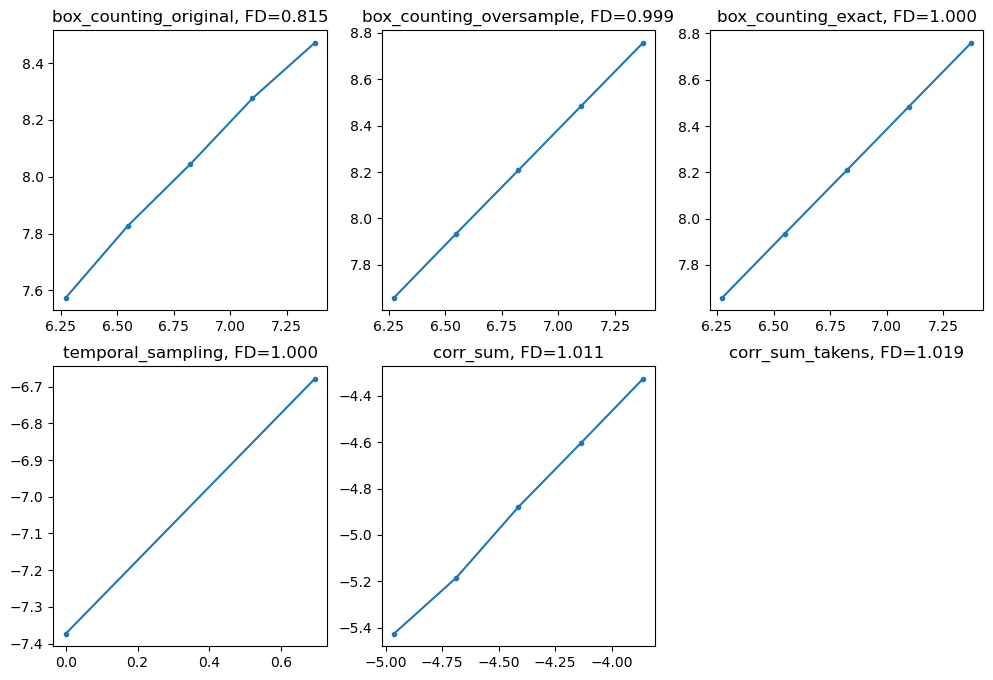

In [13]:
keys=list(res.keys())

fig, axes = plt.subplots(2,3,figsize=(12,8))
for i in range(3):
    key=keys[i]
    r=res[key]
    axes[0,i].plot(-np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
    axes[0,i].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="temporal_sampling"
r=res[key]
axes[1,0].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,0].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum"
r=res[key]
axes[1,1].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,1].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum_takens"
r=res[key]
ax=axes[1,2]
ax.set_title("{}, FD={:.3f}".format(key,r))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);

# Koch curve

In [14]:
xs=utils.gen_koch(6,shape='curve')

In [15]:
bs=np.mean(np.linalg.norm(xs[:-1,:]-xs[1:,:],axis=1))
scales=bs*np.exp(np.linspace(np.log(1),np.log(2),3))*2
oversample_rate=100
res={}
for method in ["original","oversample","exact"]:
    r=fractal.box_counting(xs,scales,method=method, oversample_rate=oversample_rate, return_boxes=True)
    res["box_counting_"+method]=r

r=fractal.temporal_sampling(xs, min_step=1, max_step=2, return_boxes=True)
res["temporal_sampling"]=r    

scales=0.01*np.exp(np.linspace(np.log(1),np.log(3),3))
r=fractal.corr_sum(xs, scales, return_boxes=True)
res["corr_sum"]=r

r=fractal.corr_sum_takens(xs)
res["corr_sum_takens"]=r

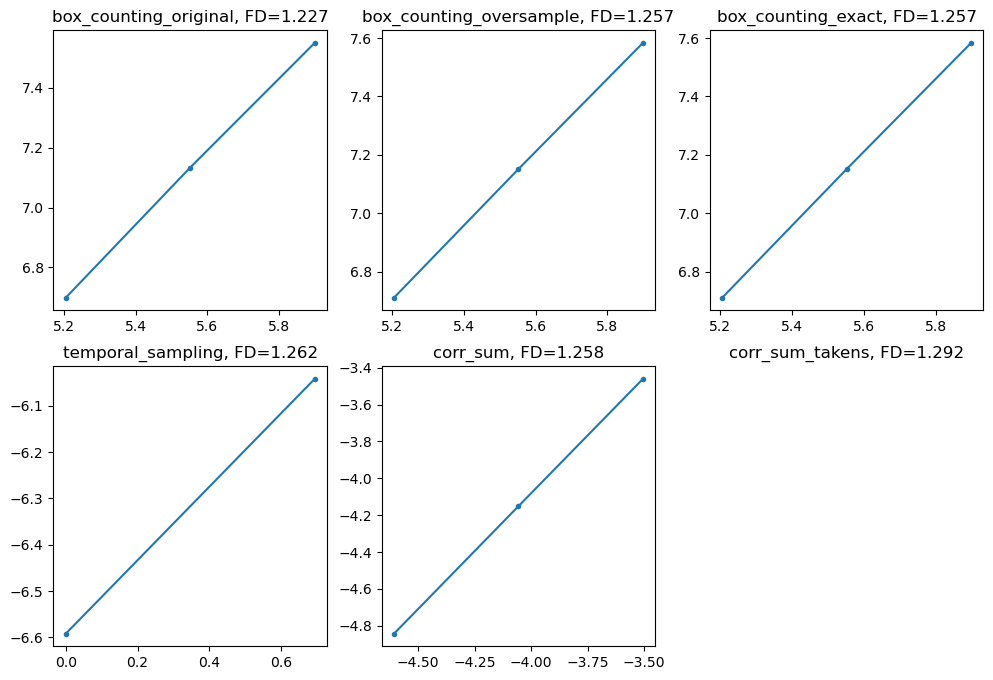

In [16]:
keys=list(res.keys())

fig, axes = plt.subplots(2,3,figsize=(12,8))
for i in range(3):
    key=keys[i]
    r=res[key]
    axes[0,i].plot(-np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
    axes[0,i].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="temporal_sampling"
r=res[key]
axes[1,0].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,0].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum"
r=res[key]
axes[1,1].plot(np.log(r['boxes'][:,0]),np.log(r['boxes'][:,1]),marker='.')
axes[1,1].set_title("{}, FD={:.3f}".format(key,r['fd']))

key="corr_sum_takens"
r=res[key]
ax=axes[1,2]
ax.set_title("{}, FD={:.3f}".format(key,r))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);

# Generalized fractal dimension

In [17]:
xs=utils.gen_koch(6,shape='curve')
bs=np.mean(np.linalg.norm(xs[:-1,:]-xs[1:,:],axis=1))
scales=bs*np.exp(np.linspace(np.log(1),np.log(2),3))*2

q=1.0001 vs q=1

In [18]:
r0=fractal.box_counting_generalized(xs, scales, q=1)
r1=fractal.box_counting_generalized(xs, scales, q=1.0001)
r0['fd'],r1['fd']

(1.1951425836274356, 1.1951431648487938)

q=0.001 vs q=0

In [19]:
r0=fractal.box_counting_generalized(xs, scales, q=0)
r1=fractal.box_counting_generalized(xs, scales, q=0.0001)
r2=fractal.box_counting(xs, scales, method='exact')
r0['fd'],r1['fd'],r2['fd']

(1.2565846306330122, 1.2564894195009577, 1.2565846306330122)

# Dual total least squares method

In [20]:
xs=utils.gen_koch(6,shape='curve')
st=0.025
s=-1
n=120
scales=np.power(10,(s-st*np.array(range(n))))

In [21]:
r=fractal.box_counting(xs, scales, method='original', return_boxes=True)

In [22]:
rr=r['boxes']
lrr=np.log10(rr)
lrr[:,0]=-lrr[:,0]

r1=utils.get_reflex(lrr, return_cost=True)

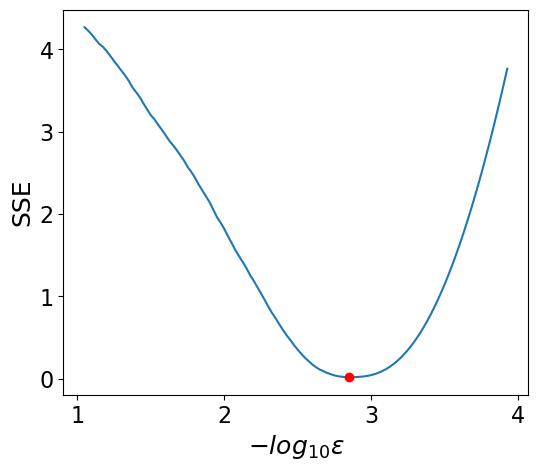

In [23]:
labelsize=18
ticksize=16
fig=plt.figure(figsize=(6,5))
es0=r1['cost']
ii0=r1['min_idx']
plt.plot(lrr[2:-2,0],es0)
plt.plot(lrr[ii0,0],es0[ii0],'ro')
plt.xlabel('$-log_{10}\\epsilon$',fontsize=labelsize)
plt.ylabel('SSE',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize);

(1.0, 3.5)

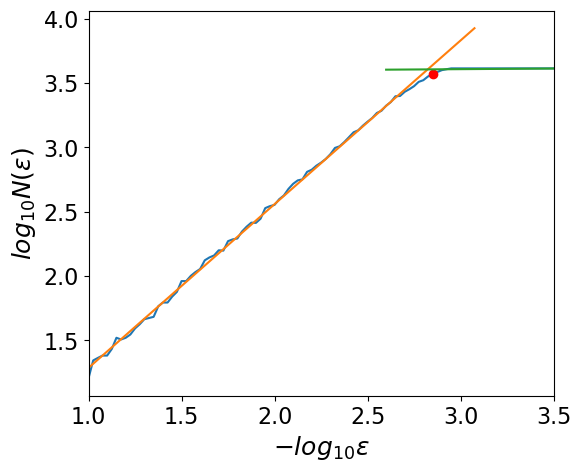

In [24]:
fig=plt.figure(figsize=(6,5))

rr=r['boxes']
plt.plot(-np.log10(rr[:,0]),np.log10(rr[:,1]))#,marker='.')
plt.plot(-np.log10(rr[ii0,0]),np.log10(rr[ii0,1]),'ro')#,marker='.')

lrr=np.log10(rr)

x=lrr[:,0]
y=lrr[:,1]

es=[]
i=ii0
xs=[x[:i],x[i:]]
ys=[y[:i],y[i:]]

xps=[x[:i+10],x[i-10:]]
yps=[y[:i+10],y[i-10:]]
for j in range(len(xs)):
    x0=xs[j]
    y0=ys[j]
    regression = utils.perform_odr(x0, y0)
    bb=regression.beta
    x1=xps[j]
    plt.plot(-x1,bb[1]*x1+bb[0])
    
plt.xlabel('$-log_{10}\\epsilon$',fontsize=labelsize)
plt.ylabel('$log_{10}N(\\epsilon)$',fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlim([1,3.5])

# Find elbow scale

In [25]:
xs=utils.gen_koch(6,shape='curve')

In [26]:
res=fractal.find_elbow_scale(xs,return_boxes=True)

In [27]:
np.log10(res['scale'])

-2.6127275283614058

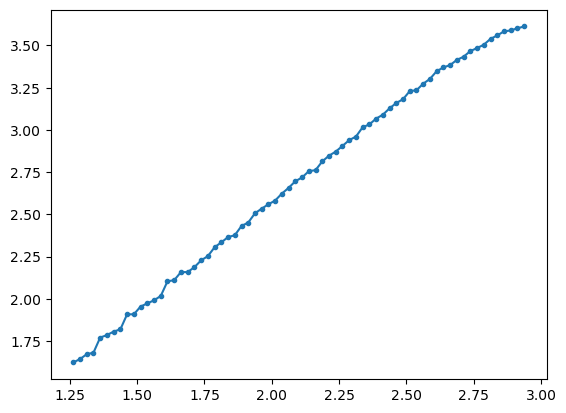

In [28]:
plt.plot(-np.log10(res['boxes'][:,0]),np.log10(res['boxes'][:,1]),marker='.')